In [ ]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from src.preprocessing import load_images_from_folder, augment_images
from src.model import build_model
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import pickle

# 1. Carrega imagens
X, y = load_images_from_folder("../data/lavouras")
X_aug, y_aug = augment_images(X, y)

# 2. Codifica labels
le = LabelEncoder()
y_all = le.fit_transform(np.concatenate([y, y_aug]))
X_all = np.concatenate([X, X_aug])

# 3. Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=42)

# 4. Modelo
model = build_model(num_classes=len(le.classes_))
model.fit(X_train / 255.0, y_train, validation_data=(X_test / 255.0, y_test), epochs=10)

# 5. Avaliação
y_pred = model.predict(X_test / 255.0).argmax(axis=1)
print(classification_report(y_test, y_pred, target_names=le.classes_))


Epoch 1/10
541/541 [==============================] - 160s 287ms/step - loss: 0.5923 - accuracy: 0.8105 - val_loss: 0.3444 - val_accuracy: 0.8835
Epoch 2/10
541/541 [==============================] - 150s 277ms/step - loss: 0.3026 - accuracy: 0.8984 - val_loss: 0.3786 - val_accuracy: 0.8764
Epoch 3/10
541/541 [==============================] - 142s 263ms/step - loss: 0.2325 - accuracy: 0.9231 - val_loss: 0.3377 - val_accuracy: 0.8822
Epoch 4/10
541/541 [==============================] - 139s 257ms/step - loss: 0.1840 - accuracy: 0.9382 - val_loss: 0.2710 - val_accuracy: 0.9087
Epoch 5/10
541/541 [==============================] - 140s 260ms/step - loss: 0.1544 - accuracy: 0.9474 - val_loss: 0.2437 - val_accuracy: 0.9150
Epoch 6/10
541/541 [==============================] - 138s 255ms/step - loss: 0.1184 - accuracy: 0.9611 - val_loss: 0.2510 - val_accuracy: 0.9161
Epoch 7/10
541/541 [==============================] - 137s 254ms/step - loss: 0.1036 - accuracy: 0.9655 - val_loss: 0.2553 -

In [ ]:
with open('../models/label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

model.save('../models/lavoura_model.h5')

C:\Users\sergi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


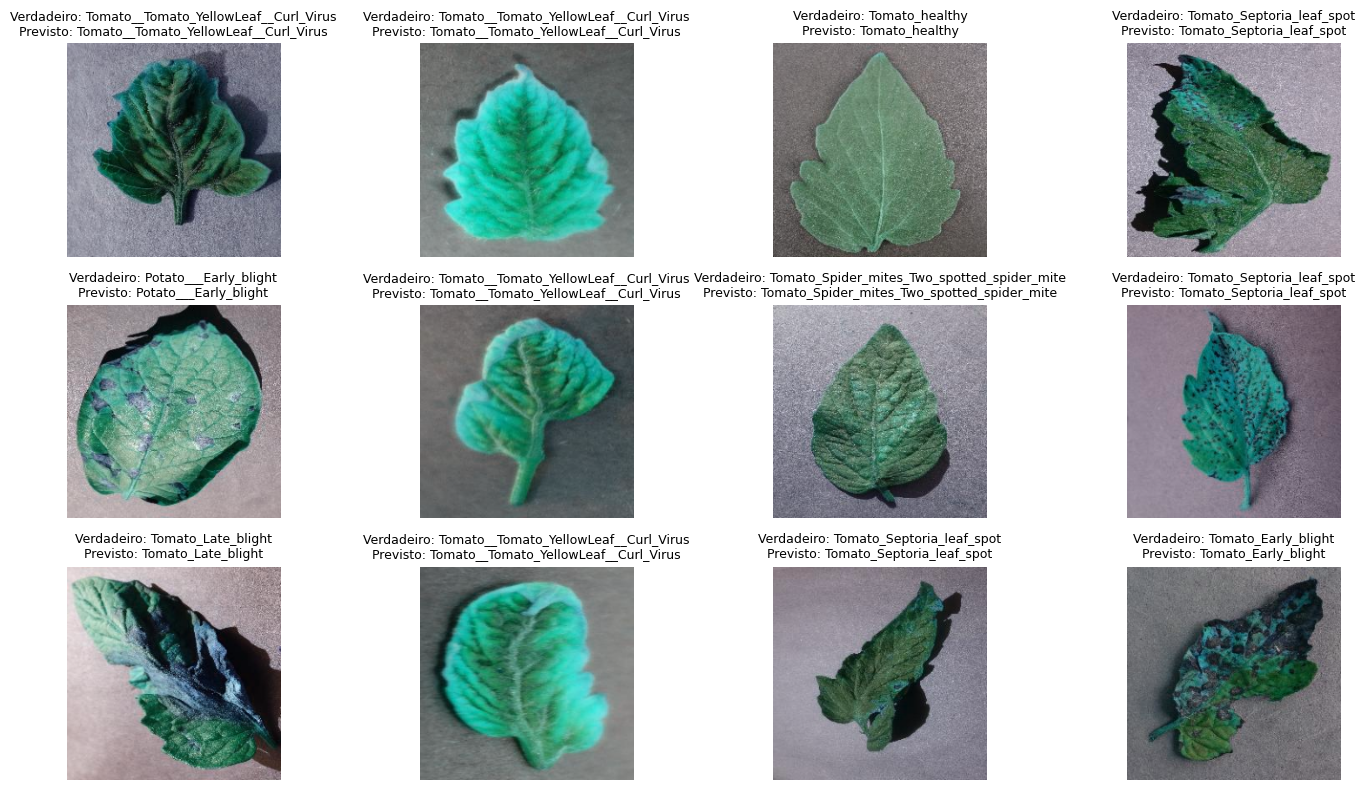

In [ ]:
def show_predictions(X_test, y_test, y_pred, label_encoder, n=12):
    plt.figure(figsize=(15, 8))
    indices = np.random.choice(len(X_test), size=n, replace=False)

    for i, idx in enumerate(indices):
        img = X_test[idx]
        true_label = label_encoder.inverse_transform([y_test[idx]])[0]
        pred_label = label_encoder.inverse_transform([y_pred[idx]])[0]
        
        plt.subplot(3, 4, i+1)
        plt.imshow(img.astype("uint8"))
        plt.title(f"Verdadeiro: {true_label}\nPrevisto: {pred_label}", fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Chamada da função
show_predictions(X_test, y_test, y_pred, le)
